In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
import datetime as dt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(Path('Resources/combined_zillow.csv'),parse_dates=['Date'], infer_datetime_format=True)
df['DeltaDate'] = df['Date'].apply(lambda x: dt.datetime.now()-x)
df['DeltaDate'] = df['DeltaDate'].apply(lambda x: x.days)
df

,Bedrooms,RegionName,Date,Price,DeltaDate
0,0,Memphis,1996-01-31,75490.0,9318
1,0,Memphis,1996-02-29,75633.0,9289
2,0,Memphis,1996-03-31,75801.0,9258
3,0,Memphis,1996-04-30,76142.0,9228
4,0,Memphis,1996-05-31,76524.0,9197
...,...,...,...,...,...
642976,5,Braden,2019-11-30,266558.0,614
642977,5,Braden,2019-12-31,269833.0,583
642978,5,Braden,2020-01-31,271472.0,552
642979,5,Braden,2020-02-29,276641.0,523


In [3]:
enc = OrdinalEncoder()
X_df = df.drop(["Price"],axis=1)
X_enc = enc.fit_transform(X_df[["RegionName","Bedrooms"]])
X_df_enc = pd.DataFrame(X_enc)
X_df_enc

,0,1
0,302.0,0.0
1,302.0,0.0
2,302.0,0.0
3,302.0,0.0
4,302.0,0.0
...,...,...
642976,47.0,5.0
642977,47.0,5.0
642978,47.0,5.0
642979,47.0,5.0


In [4]:
# Separate the features (X) from the target (y):
y = df['Price']
X = X_df_enc.copy()

In [5]:
# Split data into training & testing:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_train.shape

(482235, 2)

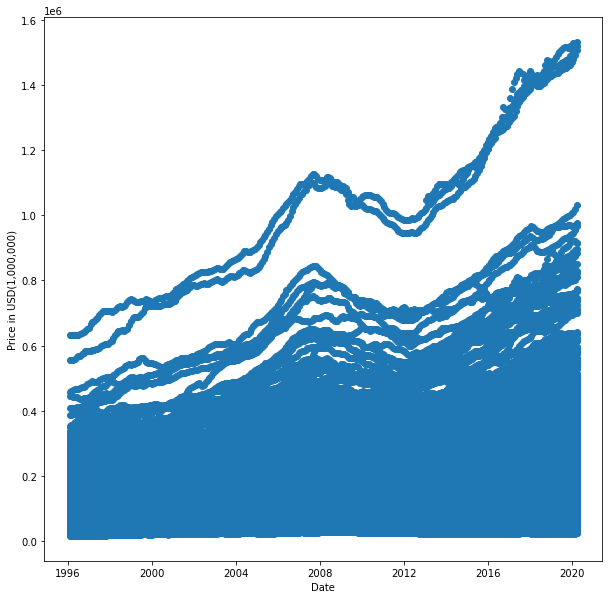

In [6]:
# First review the data
plt.scatter(df.Date, df.Price)
plt.xlabel('Date')
plt.ylabel('Price in USD(1,000,000)')
plt.gcf().set_size_inches((10, 10))  
plt.show()

In [7]:
df.Bedrooms.value_counts()

0    146624
3    137098
2    120286
4    117546
5     80417
1     41010
Name: Bedrooms, dtype: int64

<AxesSubplot:ylabel='Density'>

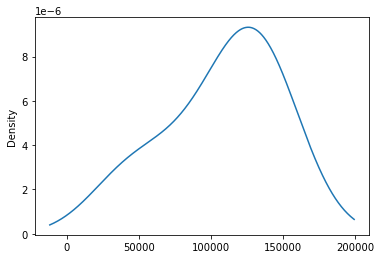

In [8]:
df_counts = df.Bedrooms.value_counts()
df_counts.plot.density()

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
# Predict() method is used to generate a prediciton
y_pred = model.predict(X_test)
print(y_pred.shape)

(160746,)


In [11]:
X_test_inverse=pd.DataFrame(enc.inverse_transform(X_test))
X_test_inverse

,0,1
0,White Bluff,4
1,Greeneville,2
2,Gordonsville,3
3,Shiloh,0
4,Andersonville,3
...,...,...
160741,Centerville,2
160742,Five Points,3
160743,Troy,2
160744,Pleasant View,3


In [12]:
X_test_inverse["Price Predictions"]=y_pred
X_test_inverse["Actual Price"]=y_test.values
X_test_inverse

,0,1,Price Predictions,Actual Price
0,White Bluff,4,158813.254295,103888.0
1,Greeneville,2,119990.233721,66765.0
2,Gordonsville,3,141303.977348,155469.0
3,Shiloh,0,74760.907554,58908.0
4,Andersonville,3,143385.448479,122000.0
...,...,...,...,...
160741,Centerville,2,121424.136056,54166.0
160742,Five Points,3,141558.379375,66613.0
160743,Troy,2,116636.752454,48731.0
160744,Pleasant View,3,139072.177746,139766.0


In [13]:
X_test_inverse["Difference"]=X_test_inverse["Price Predictions"]-X_test_inverse["Actual Price"]
Average=X_test_inverse["Difference"].values.mean()
Average

191.75761683652766

In [14]:
data = {
  "0": [251],
  "1": [4]
}

#load data into a DataFrame object:
df2 = pd.DataFrame(data)

print(df2) 

     0  1
0  251  4


In [15]:
y_test=model.predict(df2)
y_test

array([161831.38743565])

In [16]:
print(model.coef_)
print(model.intercept_)

[-1.15637285e+01  2.12212338e+04]
79848.94809750054


In [17]:
# import joblib
# joblib.dump(model,"Trained_Linear_Regression_Model.joblib")